In [1]:
from mave_calibration.initializations import kmeans_init
from mave_calibration.skew_normal import density_utils
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
true_params = [
    [1.5, -2.5, 1.5],
    [2, 6., 2]
]

true_weights = [.5, .5]

n_samples = 10000

In [3]:
X = np.concatenate([sps.skewnorm.rvs(a, loc, scale, size=int(round(n_samples * w))) for (a, loc, scale),w in zip(true_params, true_weights)])

In [4]:
component_params = kmeans_init(X, n_clusters=len(true_params))
component_weights = density_utils.component_posteriors(X, component_params,np.ones(len(true_params))/3).mean(1)

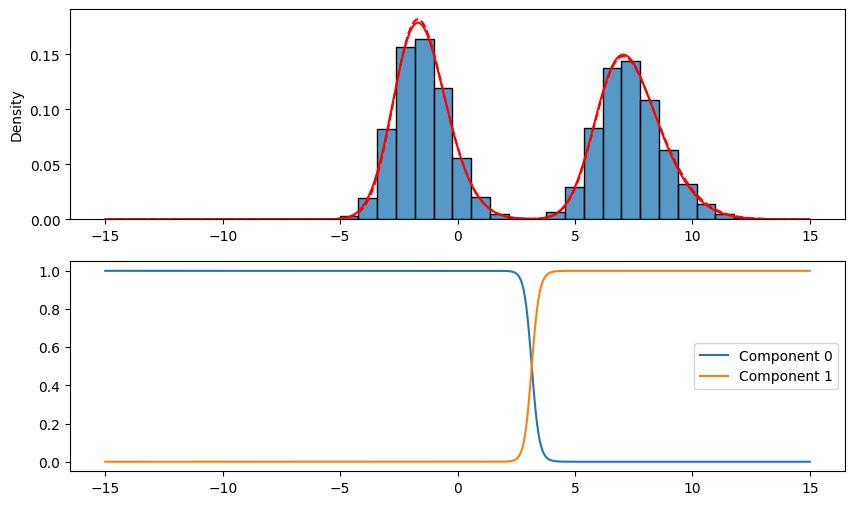

In [5]:
fig,ax = plt.subplots(2,1,figsize=(10,6))
sns.histplot(X,stat='density',ax=ax[0])
x = np.linspace(-15, 15, 1000)
ax[0].plot(x, density_utils.mixture_pdf(x, component_params, component_weights), color='red')
ax[0].plot(x, density_utils.mixture_pdf(x, true_params, true_weights), color='red',linestyle='--')
for i,P in enumerate(density_utils.component_posteriors(x, component_params, component_weights)):
    ax[1].plot(x , P,label=f"Component {i}")
ax[1].legend()